## Importing necessary libraries

In [1]:
#Data Manipulation and Handling Libraries
import pandas as pd
import numpy as np

#Data Visualisation Libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Multicollinearity Test Libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Model selection libraries
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,learning_curve,KFold

#ML models
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
import xgboost
from xgboost import XGBRegressor

#Model evaluation libraries
from sklearn.metrics import r2_score,mean_squared_error

#Warning filter library
import warnings
warnings.filterwarnings('ignore')


### Loading DataFrame

In [2]:
df1=pd.read_excel('Medibuddy insurance data personal details.xlsx')
df2=pd.read_csv('Medibuddy Insurance Data Price.csv')

In [3]:
df1.head()

,Policy no.,children,smoker,region
0,PLC157006,0,no,southwest
1,PLC157033,1,no,southwest
2,PLC157060,0,no,southwest
3,PLC157087,1,no,southwest
4,PLC157186,5,no,southwest


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Policy no.  1338 non-null   object
 1   children    1338 non-null   int64 
 2   smoker      1338 non-null   object
 3   region      1338 non-null   object
dtypes: int64(1), object(3)
memory usage: 41.9+ KB


In [5]:
df2.head()

,Policy no.,age,sex,bmi,charges in INR
0,PLC156898,19,female,27.900,16884.92400
1,PLC156907,18,male,33.770,1725.55230
2,PLC156916,28,male,33.000,4449.46200
3,PLC156925,33,male,22.705,21984.47061
4,PLC156934,32,male,28.880,3866.85520


In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Policy no.      1338 non-null   object 
 1   age             1338 non-null   int64  
 2   sex             1338 non-null   object 
 3   bmi             1338 non-null   float64
 4   charges in INR  1338 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 52.4+ KB


Observations from df.info()
1. Both the DataFrames have 1338 entries.
2. df1 has 4 independent columns and df2 has 1 dependent column i.e 'charges in INR' and 4 independent columns.
3. There are no null values in either of the DataFrame.
4. Some columns are continuous while some categorical in nature.

### Merging the two DataFrames (on common column i.e Policy no.)

In [7]:
df_merge=pd.merge(df1,df2,how='inner',on='Policy no.')

In [8]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Policy no.      1338 non-null   object 
 1   children        1338 non-null   int64  
 2   smoker          1338 non-null   object 
 3   region          1338 non-null   object 
 4   age             1338 non-null   int64  
 5   sex             1338 non-null   object 
 6   bmi             1338 non-null   float64
 7   charges in INR  1338 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 94.1+ KB


In [9]:
df_merge.head()

,Policy no.,children,smoker,region,age,sex,bmi,charges in INR
0,PLC157006,0,no,southwest,23,male,34.4,1826.843
1,PLC157033,1,no,southwest,19,male,24.6,1837.237
2,PLC157060,0,no,southwest,56,male,40.3,10602.385
3,PLC157087,1,no,southwest,30,female,32.4,4149.736
4,PLC157186,5,no,southwest,19,female,28.6,4687.797


### One-hot encoding on 'sex','region' and smoker column

In [10]:
ohe_sex=pd.get_dummies(df_merge['sex'],drop_first=True)
ohe_region=pd.get_dummies(df_merge['region'],drop_first=True)
ohe_smoker=pd.get_dummies(df_merge['smoker'],drop_first=True)

In [11]:
ohe_sex

,male
0,1
1,1
2,1
3,0
4,0
...,...
1333,1
1334,0
1335,1
1336,0


In [12]:
ohe_region

,northwest,southeast,southwest
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
1333,0,0,0
1334,0,0,0
1335,0,0,0
1336,0,0,0


In [13]:
ohe_smoker

,yes
0,0
1,0
2,0
3,0
4,0
...,...
1333,1
1334,1
1335,1
1336,1


In [14]:
df=df_merge.copy()

In [15]:
df['male']=ohe_sex
df[['northwest','southeast','southwest']]=ohe_region
df['smoker']=ohe_smoker

In [16]:
df.drop(['sex','region','Policy no.'],axis=1,inplace=True)

In [17]:
df.head()

,children,smoker,age,bmi,charges in INR,male,northwest,southeast,southwest
0,0,0,23,34.4,1826.843,1,0,0,1
1,1,0,19,24.6,1837.237,1,0,0,1
2,0,0,56,40.3,10602.385,1,0,0,1
3,1,0,30,32.4,4149.736,0,0,0,1
4,5,0,19,28.6,4687.797,0,0,0,1


## Exploratory Data Analysis

In [18]:
df.describe()

,children,smoker,age,bmi,charges in INR,male,northwest,southeast,southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,1.094918,0.204783,39.207025,30.663397,13270.422265,0.505232,0.242900,0.272048,0.242900
std,1.205493,0.403694,14.049960,6.098187,12110.011237,0.500160,0.428995,0.445181,0.428995
min,0.000000,0.000000,18.000000,15.960000,1121.873900,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,26.296250,4740.287150,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,39.000000,30.400000,9382.033000,1.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,51.000000,34.693750,16639.912515,1.000000,0.000000,1.000000,0.000000
max,5.000000,1.000000,64.000000,53.130000,63770.428010,1.000000,1.000000,1.000000,1.000000


### Analysis from Descriptive Statistics:
1. Since minimum and Q1 is same for children,smoker,male and all the regions so there is no chance of outliers in the 
    lower whisker range.
2. It seems Policy coverage is for people aged in between 18 to 64 years.
3. By comparing the quartiles we can say there may be outliers in the upper whisker region for the columns children,
    bmi and charges in INR.
4. Difference between mean and median is very high for charges in INR so there is chance of skewness.

### Plotting Boxplot to visually check if there are outliers

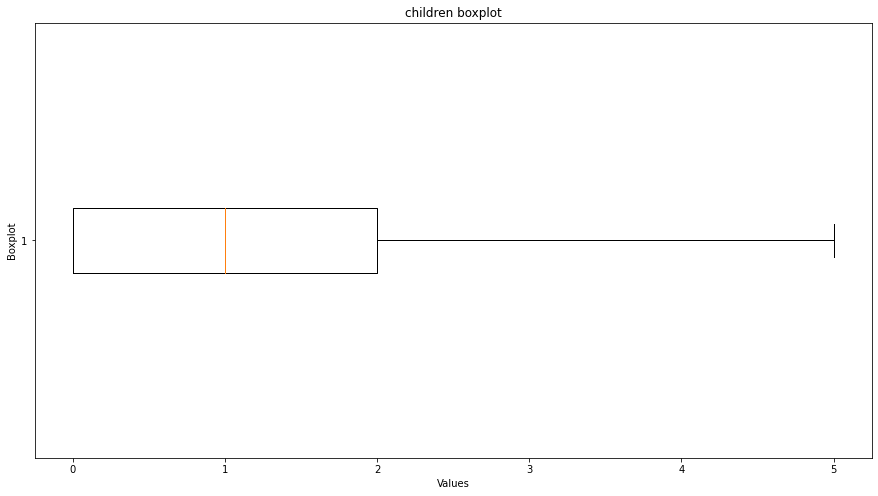

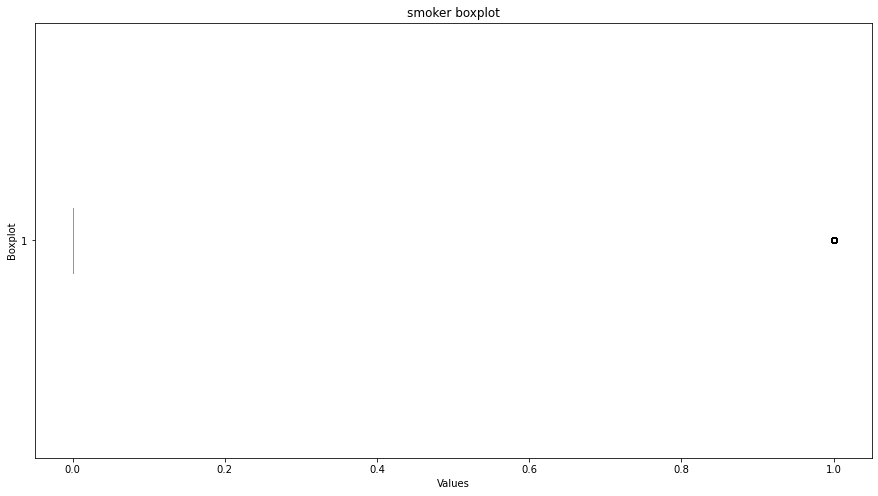

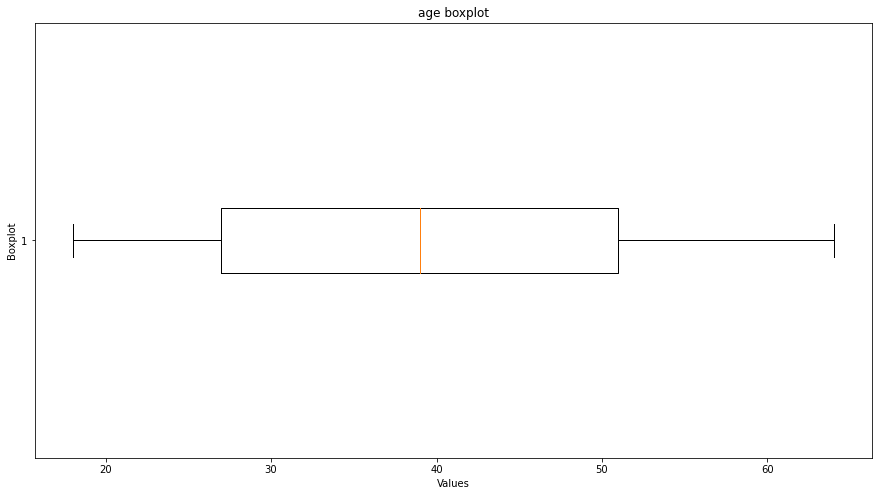

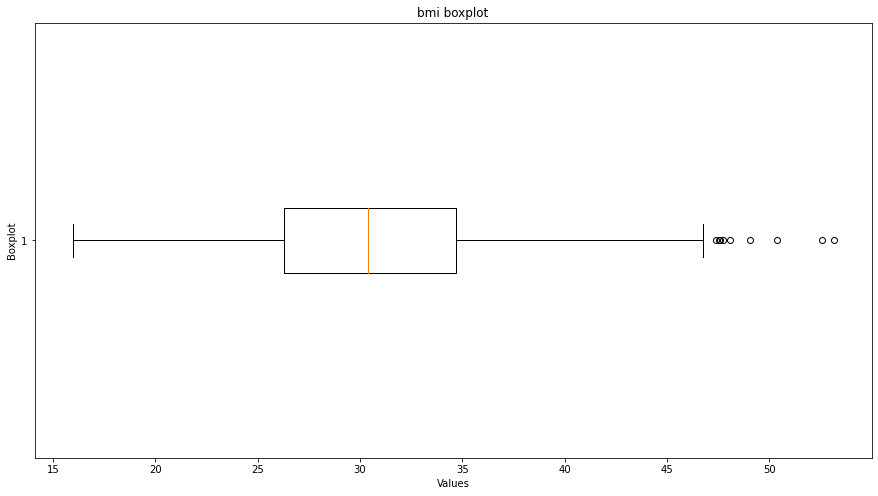

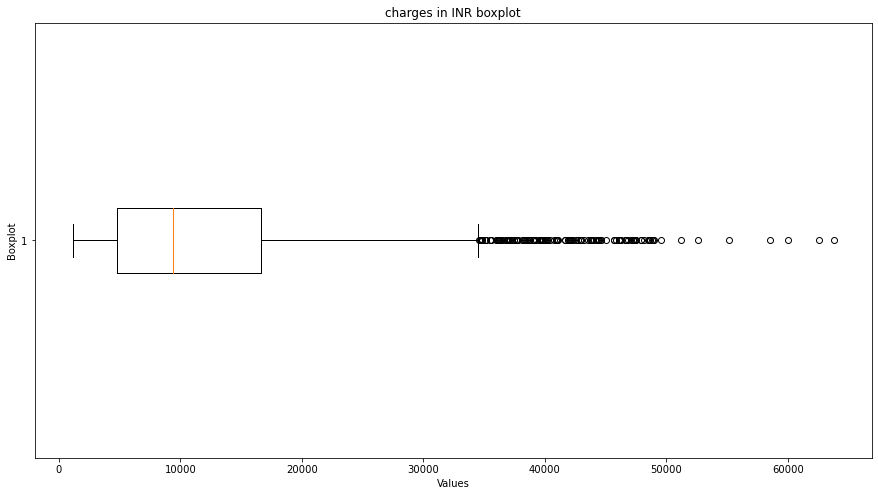

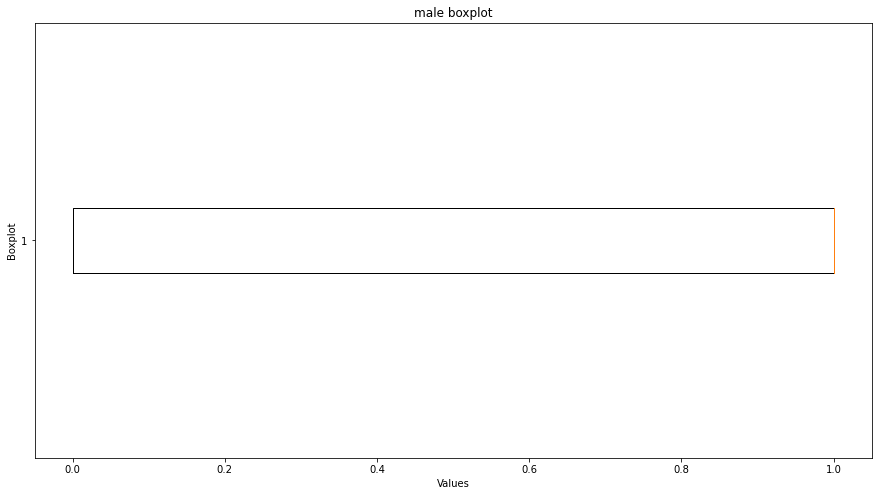

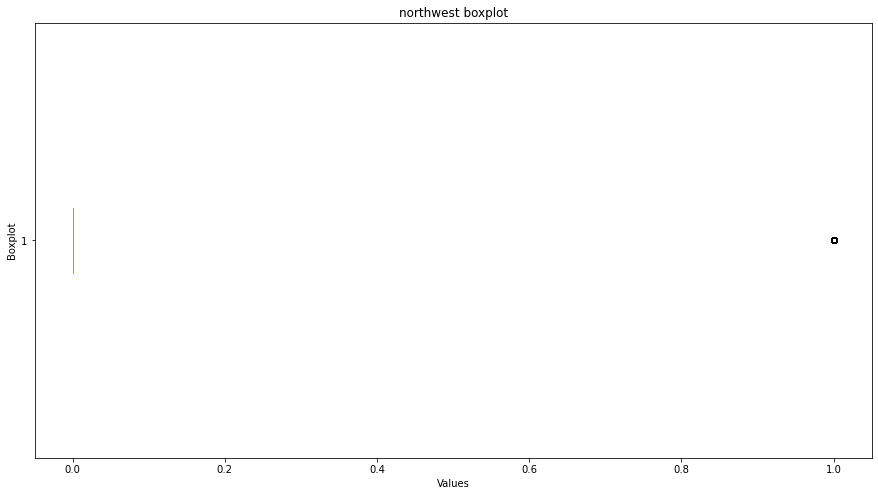

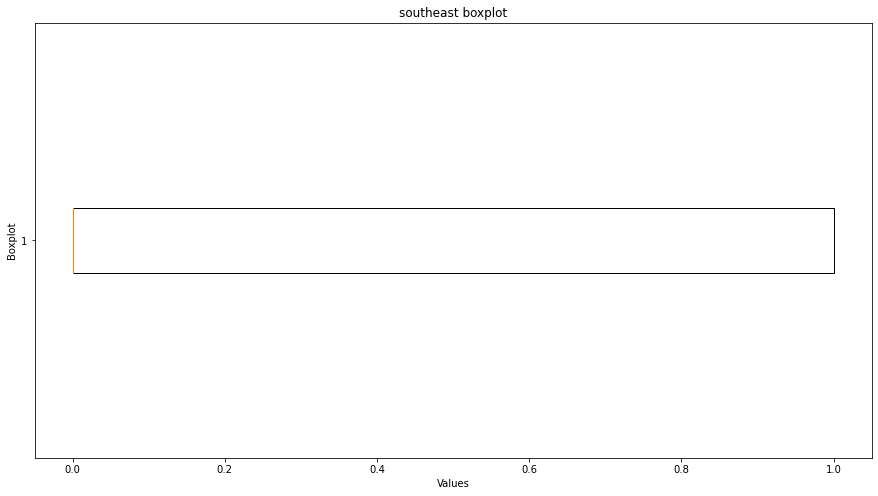

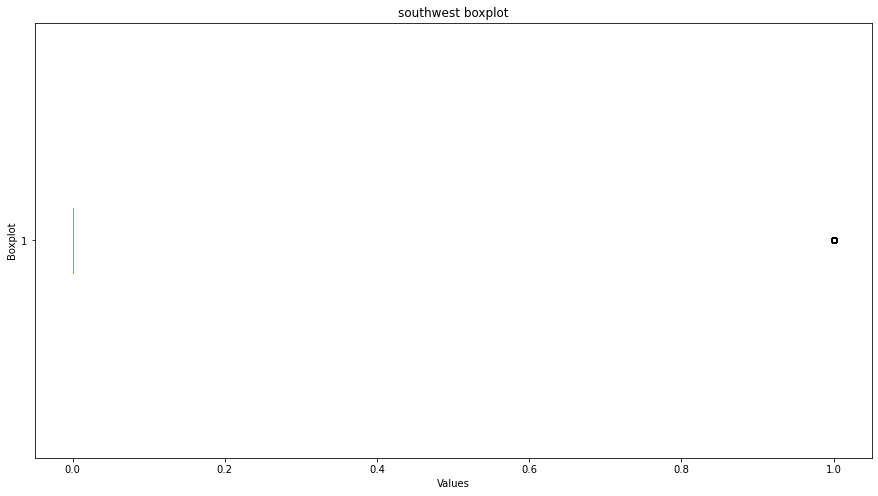

In [19]:
for col in df.columns:
    f,ax1=plt.subplots(figsize=(15,8))
    plt.boxplot(df[col],vert=False)
    plt.title(col + ' boxplot')
    plt.xlabel('Values')
    plt.ylabel('Boxplot')

Analysis from boxplot:
- charges in INR and bmi have lot of outliers in upper whisker region.

### Multivariate Analysis using Regression

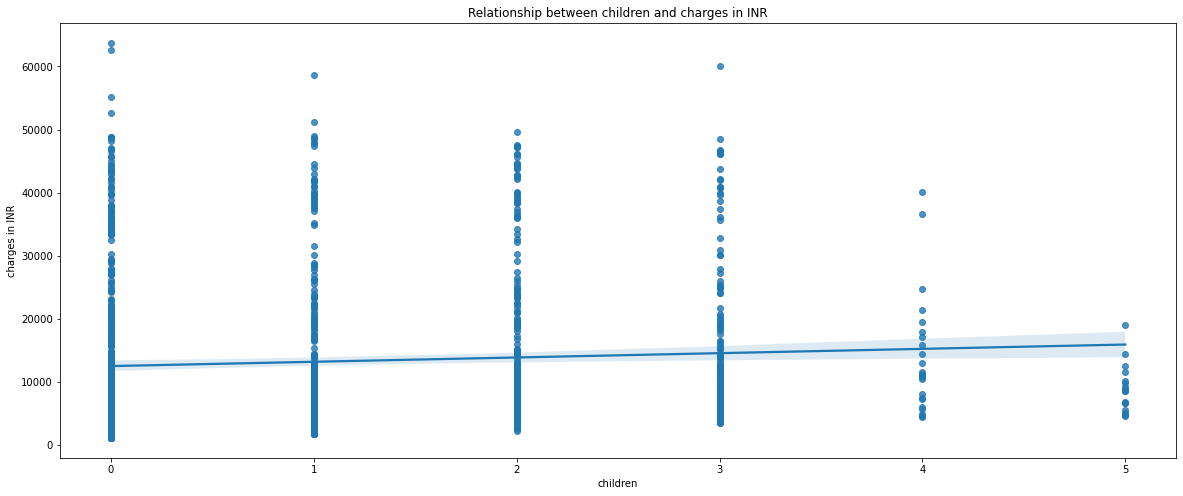

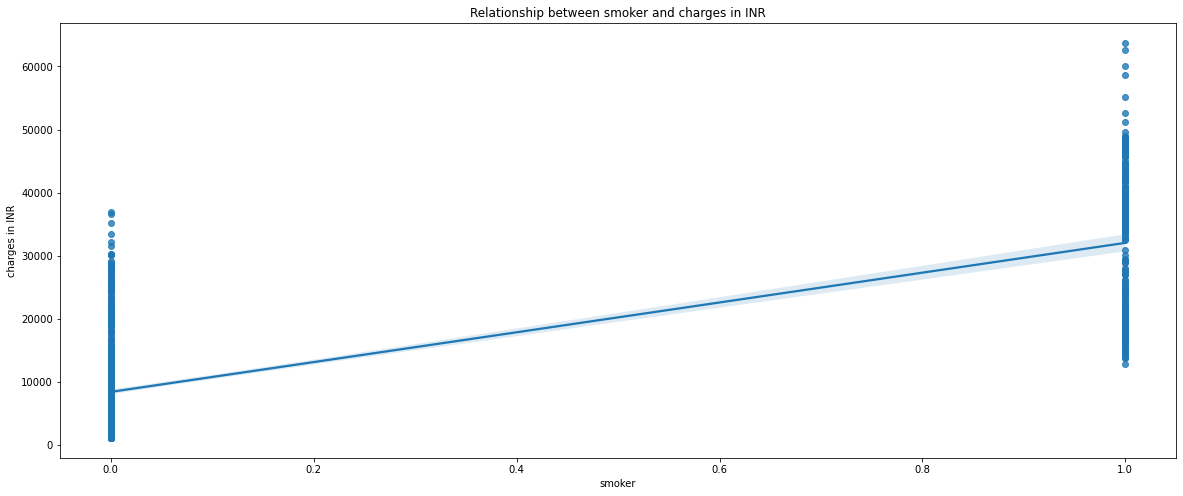

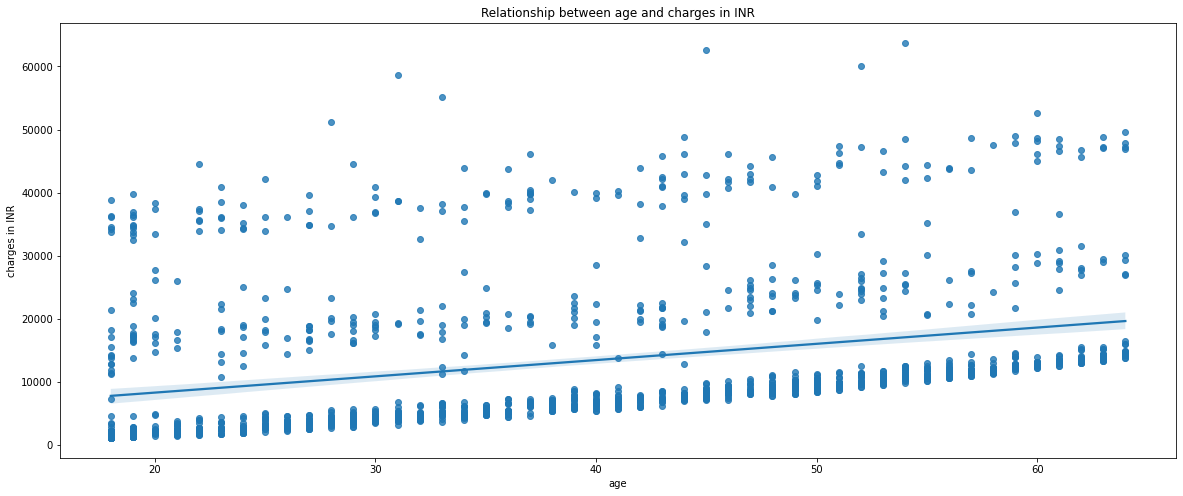

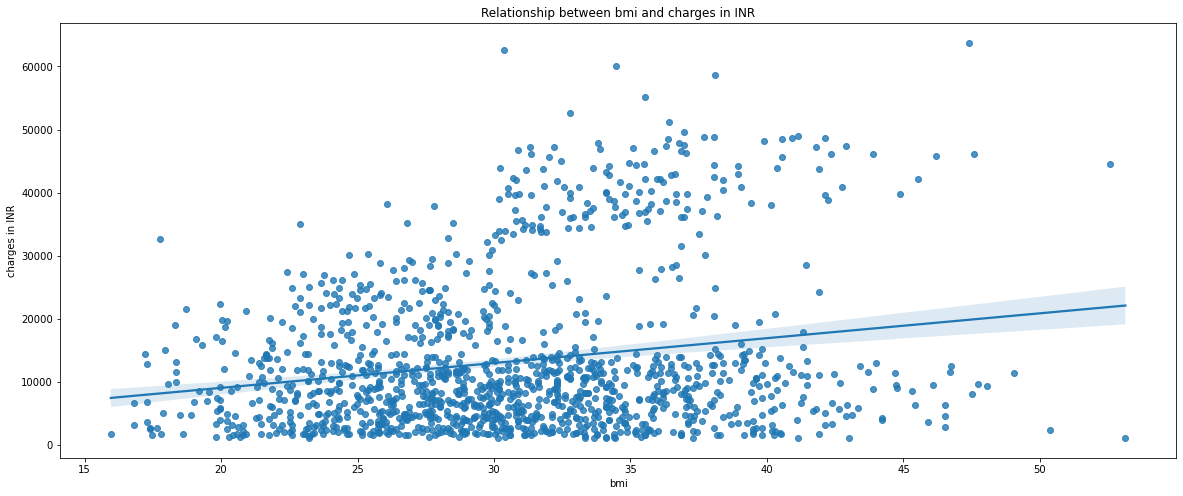

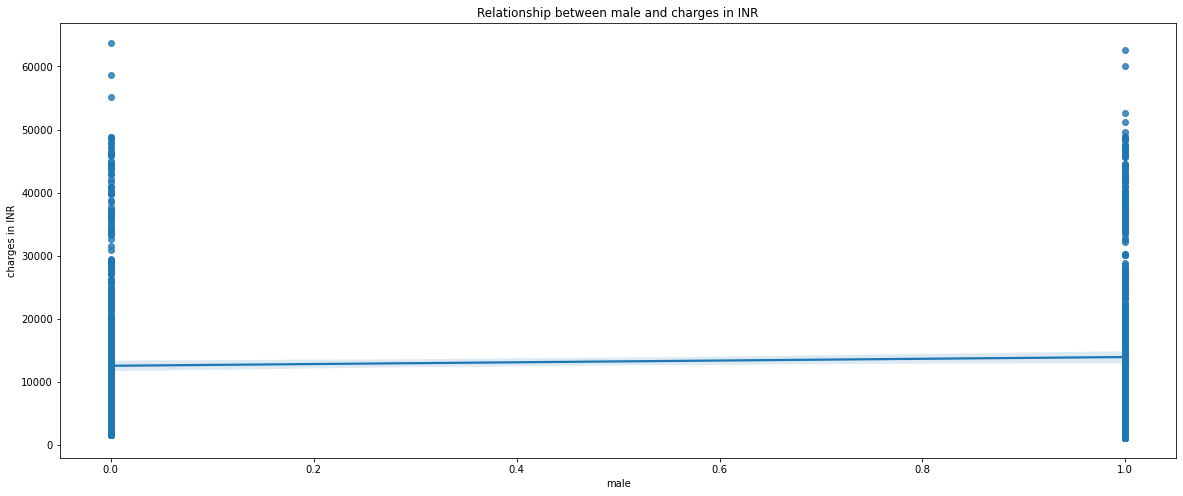

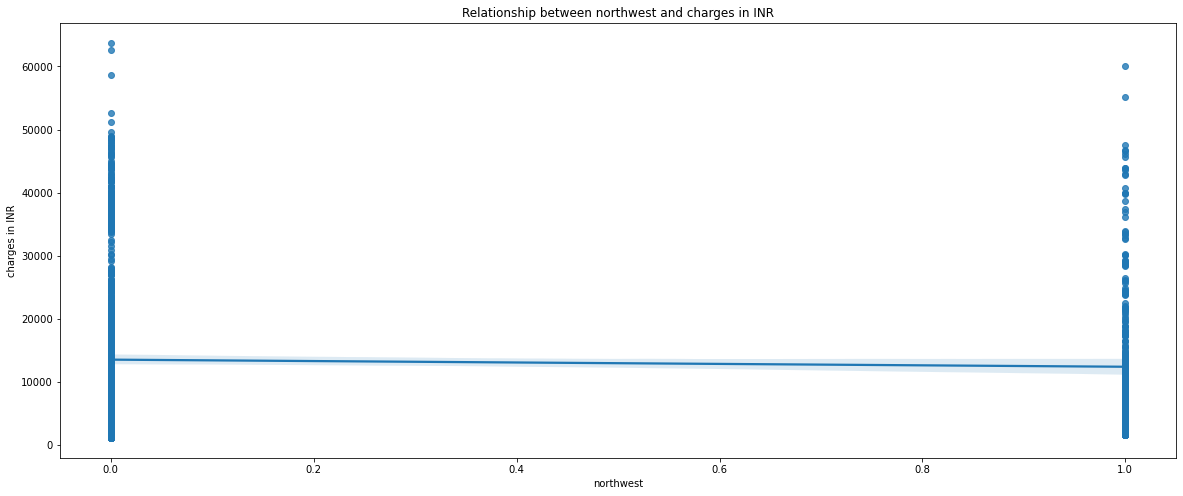

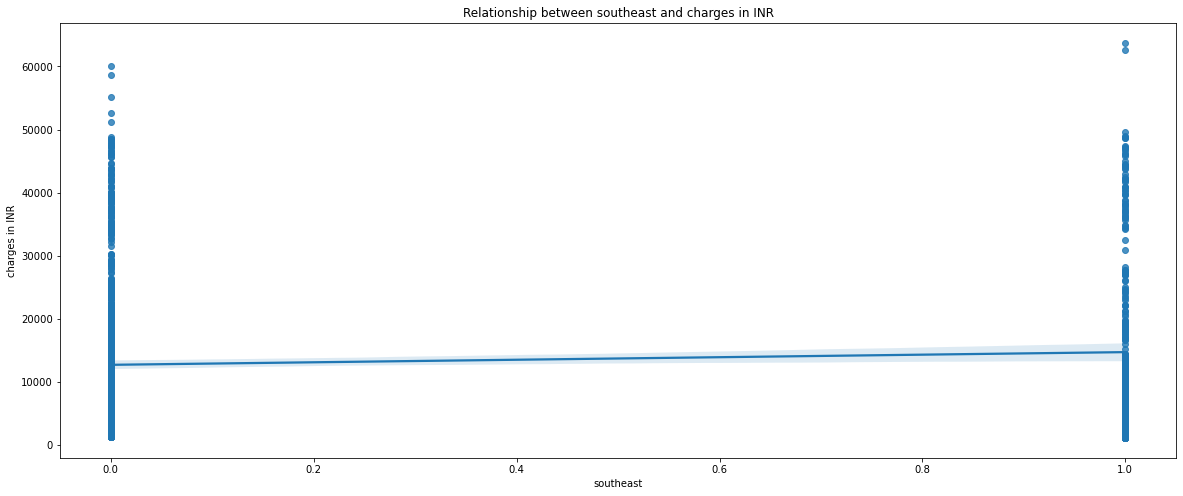

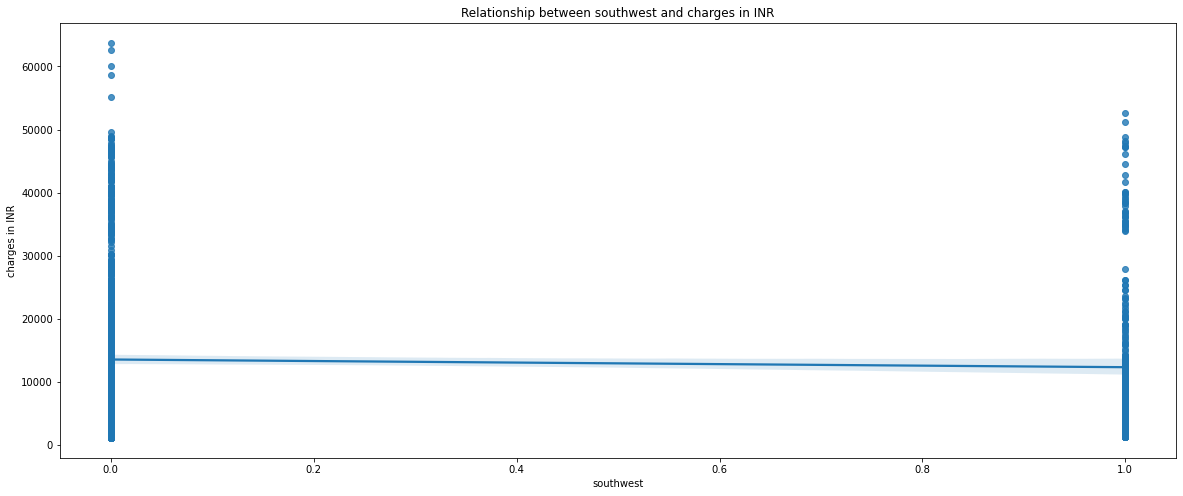

In [20]:
for col in df.columns:
    if col != 'charges in INR':
        fig,ax1=plt.subplots(figsize=(20,8))
        sns.regplot(x=df[col],y=df['charges in INR'],ax=ax1).set_title(f'Relationship between {col} and charges in INR')
        

Analysis:
1. Children,age and bmi have slight positive correlation with charges in INR.
2. Smoker has high positive correlation with charges in INR.
3. Sex and region have almost zero correlation with charges in INR.

### Multicollinearity Test
- Correlation Matrix/Heat Map(Stage 1)

<AxesSubplot:>

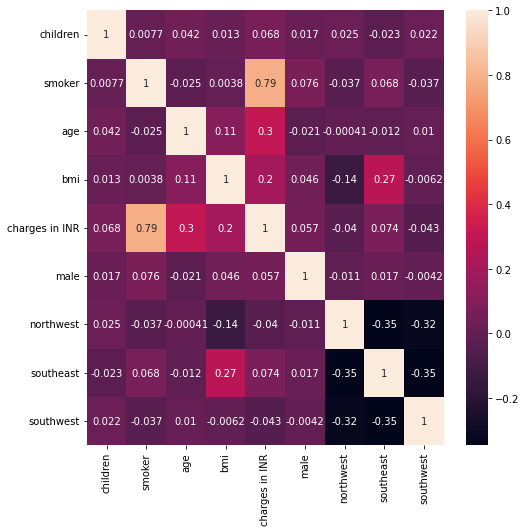

In [21]:
corr=df.corr()
f,ax=plt.subplots(figsize=(8,8))
sns.heatmap(corr,annot=True)

Analysis from test1:
1. Region southeast and bmi have a correlation of 27%. 
2. Other features have correlation less than 30% so we can conclude that there is less chance of multicollinearity 
    in the data.

### Multicollinearity Test
- Variance Inflation Factor(VIF)(stage 2)

In [22]:
vif=pd.DataFrame()
features=df.drop(['charges in INR'],axis=1)
vif['feature_name']=features.columns
vif['VIF']=[variance_inflation_factor(features,i) for i in range(features.shape[1])]
vif

,feature_name,VIF
0,children,1.809930
1,smoker,1.261233
2,age,7.686965
3,bmi,11.358443
4,male,2.003185
5,northwest,1.890281
6,southeast,2.265564
7,southwest,1.960745


Analysis from Stage2 results:
- Only two features have VIF more than 5 so we can conclude that multicollinearity does not exists in the data.

### Correlation with Target variable

In [23]:
indepen_var=df.drop('charges in INR',axis=1).columns
corr=[]
for col in indepen_var:
    corr.append(df['charges in INR'].corr(df[col]))
corr_result=pd.DataFrame([indepen_var,corr],index=['Independent Variable','Correlation']).T
corr_result=corr_result.sort_values('Correlation',ascending=False)
corr_result

,Independent Variable,Correlation
1,smoker,0.787251
2,age,0.299008
3,bmi,0.198341
6,southeast,0.073982
0,children,0.067998
4,male,0.057292
5,northwest,-0.039905
7,southwest,-0.04321


Analysis:
1. Smoker has 78.7% correlation with charges in INR.
2. Age has 30% correlation with charges in INR.

## Model Building
- Train-test-split
- Stratified KFold Cross Validation
- Hyperparameter Tuning

In [24]:
X=df.drop('charges in INR',axis=1)
y=df['charges in INR']
def model_builder(model):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    r2=r2_score(y_test,y_pred)
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    return(type(model).__name__,r2,rmse)

In [25]:
#Train_test_split on multiple models
models=[LinearRegression(),Lasso(),Ridge(),DecisionTreeRegressor(),SVR(),KNeighborsRegressor(),RandomForestRegressor(),
        AdaBoostRegressor(),GradientBoostingRegressor(),XGBRegressor()]
col_names=['Model name','R2 Score','RMSE']
result=pd.DataFrame(columns=col_names)

for i in range(len(models)):
    result.loc[len(result)]=model_builder(models[i])
    
result=result.sort_values('R2 Score',ascending=False)
result

,Model name,R2 Score,RMSE
8,GradientBoostingRegressor,0.820540,5179.221753
7,AdaBoostRegressor,0.802525,5432.961616
6,RandomForestRegressor,0.802348,5435.391772
9,XGBRegressor,0.766865,5903.164102
1,Lasso,0.723468,6429.148139
0,LinearRegression,0.723432,6429.569203
2,Ridge,0.723168,6432.633067
3,DecisionTreeRegressor,0.666385,7061.601550
5,KNeighborsRegressor,0.172726,11120.015872
4,SVR,-0.109764,12879.408176


In [26]:
#Stratified K-Fold CV on multiple models
models=[LinearRegression(),Lasso(),Ridge(),DecisionTreeRegressor(),SVR(),KNeighborsRegressor(),RandomForestRegressor(),
        AdaBoostRegressor(),GradientBoostingRegressor(),XGBRegressor()]
col_names=['Model name','CV Accuracy','CV std']
result=pd.DataFrame(columns=col_names)

for i in range(len(models)):
    kfold=KFold(n_splits=10,shuffle=True,random_state=1)
    cv_score=cross_val_score(models[i],X,y,cv=kfold)
    mean_score=np.mean(cv_score)
    std_score=np.std(cv_score)
    result.loc[len(result)]=[type(models[i]).__name__,mean_score,std_score]
    
result=result.sort_values('CV Accuracy',ascending=False)
result

,Model name,CV Accuracy,CV std
8,GradientBoostingRegressor,0.858230,0.047335
6,RandomForestRegressor,0.834202,0.049336
7,AdaBoostRegressor,0.816976,0.045208
9,XGBRegressor,0.815629,0.054771
1,Lasso,0.743205,0.045859
2,Ridge,0.743203,0.045630
0,LinearRegression,0.743187,0.045875
3,DecisionTreeRegressor,0.674824,0.091762
5,KNeighborsRegressor,0.140120,0.071169
4,SVR,-0.106314,0.041653


### Hyperparameter Tuning

In [27]:
kfold=KFold(n_splits=10,shuffle=True,random_state=1)
#Parameters Grid for tuning
#param_LS = {'alpha' : [1e-15, 1e-13, 1e-11, 1e-9,1e-7, 1e-5,1e-3, 1e-1, 0,1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100,200,300,400,500]}
#param_KNN = {'n_neighbors' : [1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100]}
#param_DTR = {'max_depth' : [3,5,7,9,10,12,14,16] , 'max_features' : ['auto', 'log2', 'sqrt', 2,3,4,5,6]}
#param_SVR = {'gamma' : ['scale' , 'auto'], 'C' : [0.5 , 1]}
param_ADB = {'learning_rate' : [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
param_GB = {'alpha' : [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
#param_XGB = {'eta' : [0.1,0.2,0.3,0.4,0.5], 'max_depth' : [3,5,7,9,10,12,14,15,16], 'gamma' : [0,10,20,30,40,50,60,70,80,90,100,200,300,400,500], 'reg_lambda' : [0,1]}
param_RF = {'max_depth' : [3,5,7,8,9,10,12,14,16], 'max_features' : ['auto', 'log2', 'sqrt', 2,3,4,5,6]}

#hyperparameter Tuning
#tune_LS = GridSearchCV(Lasso(), param_LS, cv = kfold)
#tune_Rg = GridSearchCV(Ridge(), param_LS , cv = kfold)
#tune_KNN = GridSearchCV(KNeighborsRegressor() , param_KNN , cv = kfold)
#tune_DT = GridSearchCV(DecisionTreeRegressor(), param_DTR , cv = kfold)
#tune_SVR = GridSearchCV(SVR(), param_SVR , cv = kfold)
tune_ADB = GridSearchCV(AdaBoostRegressor() , param_ADB , cv = kfold)
tune_GB = GridSearchCV(GradientBoostingRegressor() , param_GB , cv = kfold)
#tune_XGB = GridSearchCV(XGBRegressor() , param_XGB , cv = kfold)
tune_RF = GridSearchCV(RandomForestRegressor() , param_RF , cv = kfold)

#Fitting X and Y
#tune_LS.fit(X,y)
#tune_Rg.fit(X,y)
#tune_KNN.fit(X,y)
#tune_DT.fit(X,y)
#tune_SVR.fit(X,y)
tune_ADB.fit(X,y)
tune_GB.fit(X,y)
#tune_XGB.fit(X,y)
tune_RF.fit(X,y)

#tune = [tune_LS, tune_Rg, tune_KNN, tune_DT, tune_SVR, tune_ADB, tune_GB, tune_XGB, tune_RF]
#models = ['Lasso', 'Ridge', 'KNNR' , 'DTR', 'SVR' , 'ADBR', 'GBR', 'XGBR' , 'RFR']
tune=[tune_GB,tune_RF,tune_ADB]
models=['GradientBoosting','RandomForest','AdaBoost']

for i in range(len(tune)):
    print('models:', models[i])
    print('best parameters :', tune[i].best_params_)
    


KeyboardInterrupt: 

### Stratified KFold CV post HP Tuning

In [ ]:
best_models=[GradientBoostingRegressor(alpha=0.2),RandomForestRegressor(max_depth=5, max_features=6),
             AdaBoostRegressor(learning_rate=0.1)]
best_result=pd.DataFrame(columns=['Model name','CV Accuracy','CV std'])
for i in range(len(best_models)):
    kfold=KFold(n_splits=10,shuffle=True,random_state=1)
    cv_score=cross_val_score(best_models[i],X,y,cv=kfold)
    mean_score=np.mean(cv_score)
    std_score=np.std(cv_score)
    best_result.loc[len(best_result)]=[type(best_models[i]).__name__,mean_score,std_score]
    
best_result.sort_values('CV Accuracy',ascending=False)

Analysis questions:

In [ ]:
#avg amount spent by company on each policy cover:
np.mean(df['charges in INR'])